In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
pi = np.pi


In [40]:
def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs

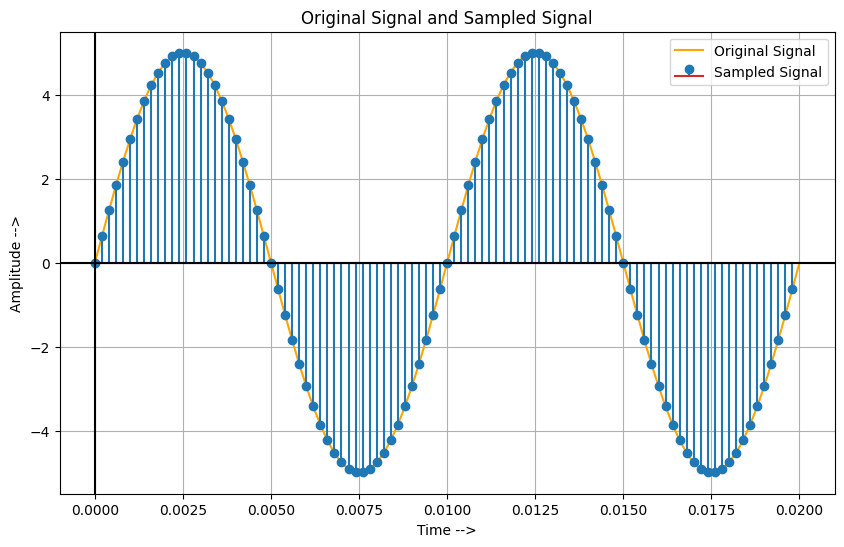

In [41]:
from itertools import cycle


A = 5 #Input signal Amplitude
fm = 100 # Message Frequency
M = 50
fs = M * fm # Sampling frequency
ts = 1 / fs #Sampling Period
cycles = 2 #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 10000)
t_sam = np.arange(0, M * cycles * ts, ts)
x_org = A * np.sin(2 * pi * fm * t_org)
x_sam = A * np.sin(2 * pi * fm * t_sam)

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'orange')
plt.stem(t_sam, x_sam)
plt.title('Original Signal and Sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.show()

In [42]:
delta = delta_dm(A, fm, fs, pi)
print(delta)

0.6283185307179586


In [43]:
# e = np.zeros(len(t_org))
# eq = np.zeros(len(t_org))
# mq = []
# i = 0
# while i < len(t_org):
#         if i == 0:
#                 e[i] = x_org[i]
#                 for j in range(0,1*M):
#                         mq.append(e[i])
#         else:
#                 e[i] = x_org[i] - mq[i - 1*M]
#                 eq[i] = delta * np.sign(e[i])
#                 for j in range(0,1*M):
#                         mq.append(eq[i] + mq[i - 1])
#         i += 1*M
# MQ = np.array(mq)

In [44]:
e=np.zeros(len(t_sam))
eq=np.zeros(len(t_sam))
mq=[]

# for i in range(len(t_sam)):
#     for j in range(2 * M):
#         mq.append(x_sam[i])
# Mq = np.array(mq)
        

In [52]:
for i in range(1,len(t_sam)):
    err = x_sam[i] - x_sam[i -1]
    if err == 0:
        for j in range(1 * M):
            mq.append(delta)
    if err > 0:
        delta+= delta
        for j in range(1 * M):
            mq.append(delta)
    else:
        delta-= delta
        for j in range(1 * M):
            mq.append(delta)
Mq = np.array(mq)

In [45]:
# e=np.zeros(len(t_sam))
# eq=np.zeros(len(t_sam))
# mq=np.zeros(len(t_sam))

# for i in range(0,len(t_sam)):
#     if i==0:
#         e[i]=x_sam[i]
#         mq[i]=eq[i]
#     else:
#         e[i]=x_sam[i]-mq[i-1]
#         eq[i]=delta*np.sign(e[i])
#         mq[i]=eq[i]+mq[i-1]

In [46]:
# Mq = []
# for i in mq:
#     for j in range(2 * M):
#         Mq.append(i)
# quan = np.array(Mq)

ValueError: x and y must have same first dimension, but have shapes (100,) and (20200,)

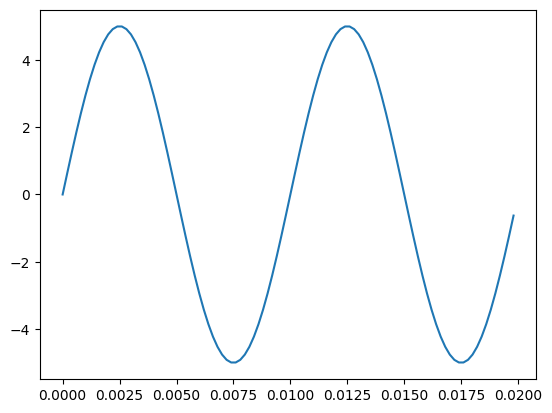

In [53]:
plt.plot(t_sam,x_sam)
plt.plot(t_sam,Mq)

In [48]:
m_rec=[]
for i in range(0,len(t_sam)):
    m_rec.append(e[i-1]+quan[i-1])

In [49]:
#Smoothing of the reconstructed signal using Butterworth Low Pass Filter
[b,a]=signal.butter(3,(1/fm)*0.005,fs=0.0005)
rec=signal.lfilter(b,a,quan)

Text(0, 0.5, 'Amplitude')

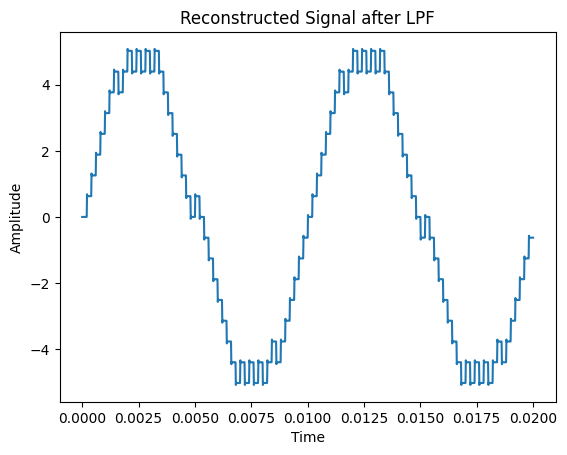

In [50]:
plt.plot(t_org,rec)
plt.title("Reconstructed Signal after LPF")
plt.xlabel("Time")
plt.ylabel("Amplitude")